In [1]:
from astropy.utils.data import conf
conf.dataurl

'http://data.astropy.org/'

In [2]:
conf.remote_timeout

10.0

In [3]:
conf.remote_timeout = 10000

In [4]:
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import Sun, Earth, Moon
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system
from poliastro.twobody import Orbit
from poliastro.util import norm, time_range

EPOCH = Time("2017-09-01 12:05:50", scale="tdb")
C_FLORENCE = "#000"
C_MOON = "#999"

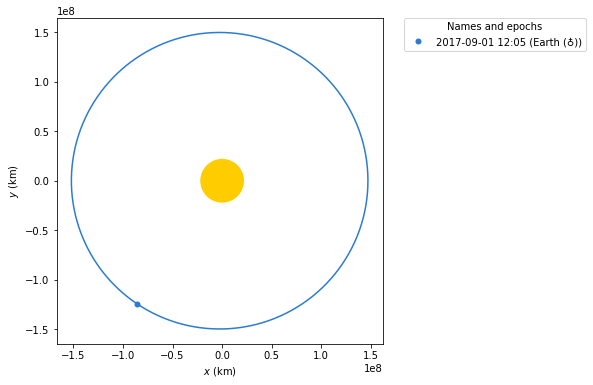

In [5]:
Earth.plot(EPOCH);

In [6]:
achilles_osc = Orbit.from_sbdb("Achilles")
achilles_osc



4 x 6 AU x 10.3 deg (HeliocentricEclipticIAU76) orbit around Sun (☉) at epoch 2459396.5008007423 (TDB)

In [7]:
achilles_osc.epoch.iso



'2021-07-01 00:01:09.184'

In [8]:
epochs = time_range(
    EPOCH - TimeDelta(3 * 30 * u.day), end=EPOCH + TimeDelta(3 * 30 * u.day)
)

In [9]:
achilles = Ephem.from_horizons("Achilles", epochs, plane=Planes.EARTH_ECLIPTIC)
achilles



Ephemerides at 50 epochs from 2017-06-03 12:05:50.000 (TDB) to 2017-11-30 12:05:50.000 (TDB)

In [10]:
achilles.plane

<Planes.EARTH_ECLIPTIC: 'Earth mean Ecliptic and Equinox of epoch (J2000.0)'>

In [11]:
earth = Ephem.from_body(Earth, epochs, plane=Planes.EARTH_ECLIPTIC)
earth

Ephemerides at 50 epochs from 2017-06-03 12:05:50.000 (TDB) to 2017-11-30 12:05:50.000 (TDB)

In [12]:
min_distance = norm(achilles.rv(EPOCH)[0] - earth.rv(EPOCH)[0]) - Earth.R
min_distance.to(u.km)

<Quantity 8.33357605e+08 km>

In [13]:
abs((min_distance - 7060160 * u.km) / (7060160 * u.km)).decompose()

<Quantity 117.03664577>

NameError: name 'C_Achilles' is not defined

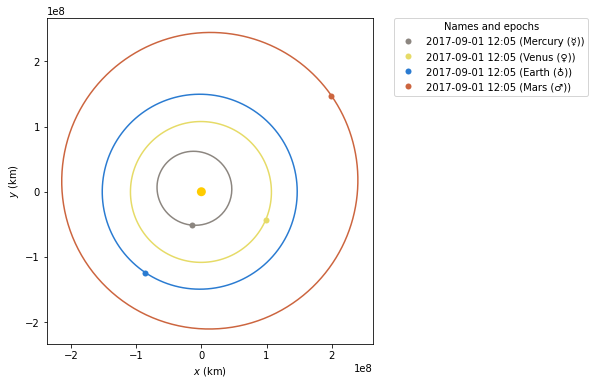

In [14]:
frame = plot_solar_system(outer=False, epoch=EPOCH)
frame.plot_ephem(achilles, EPOCH, label="Achilles", color=C_Achilles);

# frame = plot_solar_system(outer=False, epoch=EPOCH)
frame.plot_ephem(achilles, EPOCH, label="Achilles", color=C_FLORENCE);

In [16]:
epochs = time_range(EPOCH - TimeDelta(5 * u.day), end=EPOCH + TimeDelta(5 * u.day))

In [17]:
moon = Ephem.from_body(Moon, epochs, attractor=Earth)
moon


Ephemerides at 50 epochs from 2017-08-27 12:05:50.000 (TDB) to 2017-09-06 12:05:50.000 (TDB)

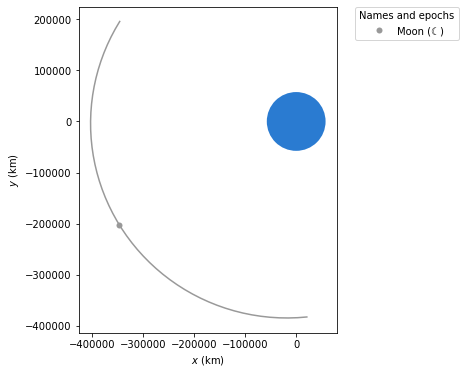

In [18]:
plotter = StaticOrbitPlotter()
plotter.set_attractor(Earth)
plotter.set_body_frame(Moon)
plotter.plot_ephem(moon, EPOCH, label=Moon, color=C_MOON);



NameError: name 'achilles_e' is not defined

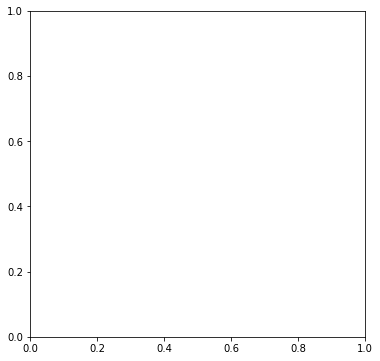

In [19]:
from matplotlib import pyplot as plt

frame = StaticOrbitPlotter()

frame.set_attractor(Earth)
frame.set_orbit_frame(Orbit.from_ephem(Earth, achilles_e, EPOCH))

frame.plot_ephem(achilles_e, EPOCH, label="Achilles", color=C_FLORENCE)
frame.plot_ephem(moon, EPOCH, label=Moon, color=C_MOON);